# MARS-Gym Experiments - Trivago Results

In [1]:

import sys, os
os.environ['PATH_EVALUATION'] =  "../../output/evaluation/"
os.environ['PATH_EVAL_REINFORCEMENT'] =  "../../output/interaction/"
os.environ['PATH_TRAIN'] =  "../../output/models/"

#import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

from mars_gym.tools.eval_viz.app import fetch_iteraction_results_path, load_all_iteraction_metrics, fetch_results_path, load_data_metrics, load_eval_params, filter_df, load_fairness_metrics, load_fairness_df
from mars_gym.tools.eval_viz.plot import plot_line_iteraction, plot_exploration_arm, get_colors, confidence, plot_bar
from  mars_gym.tools.eval_viz.app import PATH_EVAL_REINFORCEMENT

from util import list_paths_per_model, load_iteractions_params, get_metrics_reward, group_metrics, load_dataset, plot_cum_reward, plot_fairness_metrics, plot_fairness_mistreatment, plot_fairness_treatment



This notebook includes all viz of paper **'MARS-Gym: A Gym framework to model, train, and evaluate recommendation systems for marketplaces'**  and can be used for reproducibility or example of framework usage. 

We need run some scripts before vizualise results:
* scripts/simulation/chicago_usa_script.sh
* scripts/metrics/metrics_chicago_usa_script.sh
* scripts/metrics/fairness_recsys_script.sh

## Load Results

In [2]:
result_paths = list_paths_per_model(PATH_EVAL_REINFORCEMENT)
result_paths[:5]

['../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__a06cfb73a9',
 '../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__f9e2903219',
 '../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_6822e93237',
 '../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___explore_rounds_0b659e17e7',
 '../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___epsilon___0_1__76d6a2cc36']

In [3]:
# We will only filter the city of Chicago to exemplify graphs and results.
#

#city = "Rio de Janeiro, Brazil"
#city = "Como, Italy"
city = "Chicago, USA"
#city = "New York, USA"
#city = 'Copenhagen, Denmark'
#city='recsys'

df_params = load_iteractions_params(result_paths)
df_params = df_params[df_params['data_frames_preparation_extra_params.filter_city'] == city]
df_params.head()

,balance_fields,bandit_policy_class,bandit_policy_params.alpha,bandit_policy_params.arg,bandit_policy_params.decay_rate,bandit_policy_params.epsilon,bandit_policy_params.exploration_threshold,bandit_policy_params.explore_rounds,bandit_policy_params.logit_multiplier,bandit_policy_params.v_sq,...,sample_size,sampling_strategy,seed,session_test_size,split_index,test_size,test_split_type,use_sampling_in_validation,val_size,val_split_type
0,[],mars_gym.model.bandit.LinUCB,0.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,none,5,0.1,0,0.2,time,False,0.2,random
0,[],mars_gym.model.bandit.LinUCB,0.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,none,3,0.1,0,0.2,time,False,0.2,random
0,[],mars_gym.model.bandit.AdaptiveGreedy,NaN,NaN,0.000097,NaN,0.7,NaN,NaN,NaN,...,-1,none,1,0.1,0,0.2,time,False,0.2,random
0,[],mars_gym.model.bandit.ExploreThenExploit,NaN,NaN,0.000187,NaN,NaN,1000.0,NaN,NaN,...,-1,none,2,0.1,0,0.2,time,False,0.2,random
0,[],mars_gym.model.bandit.EpsilonGreedy,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,...,-1,none,5,0.1,0,0.2,time,False,0.2,random


In [4]:
# Group results

list_bandits          = df_params.groupby(["bandit_policy_class", "observation"])['iteraction'].apply(list).reset_index()
list_bandits['name']  = list_bandits.bandit_policy_class.map(str) + ' ' + list_bandits.observation.map(str)
list_bandits['name']  = list_bandits['name'].apply(lambda x: x.replace("fixed ", "").replace(" ", ""))
list_bandits['model'] = list_bandits.iteraction.apply(lambda l: l[np.random.randint(0, len(l))])
list_bandits['model_list'] = list_bandits.iteraction
list_bandits.head(2)

,bandit_policy_class,observation,iteraction,name,model,model_list
0,mars_gym.model.bandit.AdaptiveGreedy,,"[../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_6822e93237, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_83ef3f55d3, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_42716ae133, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_d3663f58fc, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_520cebc570, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_d70af8a008, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_6b44643887, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4]",mars_gym.model.bandit.AdaptiveGreedy,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4,"[../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_6822e93237, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_83ef3f55d3, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_42716ae133, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_d3663f58fc, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_520cebc570, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_d70af8a008, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_6b44643887, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4]"
1,mars_gym.model.bandit.CustomRewardModelLinUCB,,"[../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__ef475653f1, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__75eccc229a, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__bad81a6465, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__debd700fb8, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__2165771e8e, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__7966e4e52b, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__0b623b96b8, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__d5981787b1]",mars_gym.model.bandit.CustomRewardModelLinUCB,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__7966e4e52b,"[../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__ef475653f1, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__75eccc229a, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__bad81a6465, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__debd700fb8, ../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b_

In [5]:
reward_metrics = []
for i, row in list_bandits.iterrows():
    df_metrics = get_metrics_reward(row['iteraction'])
    df_metrics['bandit'] = row['name']
    df_metrics['model']  = row['model']

    df_g_metrics = group_metrics(df_metrics)
    reward_metrics.append(df_g_metrics)

In [6]:
df_all = pd.concat(reward_metrics)
df_all = df_all.reset_index().sort_values('bandit', ascending=False).set_index('bandit')
df_all

,r_mean|mean,r_mean|std,r_reward|mean,r_reward|std,r_reward|count,model|first
bandit,,,,,,
mars_gym.model.bandit.SoftmaxExplorer,0.275622,0.013914,2915.250000,147.173124,8,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___logit_multipli_1244265017
mars_gym.model.bandit.RandomPolicy,0.040749,NaN,431.000000,NaN,1,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b____1649c7bd6b
mars_gym.model.bandit.PercentileAdaptiveGreedy,0.284485,0.010725,3009.000000,113.439726,8,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___exploration_th_188ee56ba2
mars_gym.model.bandit.LinUCB,0.121703,0.007030,1287.250000,74.351962,8,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__069cd7a2fe
mars_gym.model.bandit.LinThompsonSampling,0.048501,NaN,513.000000,NaN,1,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___v_sq___0_1__4cd65ca01d
mars_gym.model.bandit.FixedPolicyPopularItem,0.104567,0.000000,1106.000000,0.000000,2,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___arg___2__cca0079f70
mars_gym.model.bandit.ExploreThenExploit,0.228906,0.006917,2421.142857,73.156063,7,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___explore_rounds_7911da6015
mars_gym.model.bandit.EpsilonGreedy,0.285147,0.015851,3016.000000,167.654406,8,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___epsilon___0_1__800191dee6
mars_gym.model.bandit.CustomRewardModelLinUCB,0.297863,0.024824,3150.500000,262.564822,8,../../output/interaction/InteractionTraining/results/InteractionTraining____mars_gym_model_b___alpha___1e_05__7966e4e52b


## DataViz - Plot Images

In [7]:
#list_bandits['name'] = list_bandits['name'].apply(lambda x: "popular_item" if x == "PopularItem" else x)
df_models = list_bandits.set_index('name')[['model_list']]
df_models.index

Index(['mars_gym.model.bandit.AdaptiveGreedy',
       'mars_gym.model.bandit.CustomRewardModelLinUCB',
       'mars_gym.model.bandit.EpsilonGreedy',
       'mars_gym.model.bandit.ExploreThenExploit',
       'mars_gym.model.bandit.FixedPolicyPopularItem',
       'mars_gym.model.bandit.LinThompsonSampling',
       'mars_gym.model.bandit.LinUCB',
       'mars_gym.model.bandit.PercentileAdaptiveGreedy',
       'mars_gym.model.bandit.RandomPolicy',
       'mars_gym.model.bandit.SoftmaxExplorer'],
      dtype='object', name='name')

In [8]:
sample_size       = 15000
window_size       = 1000 
bandits           = df_models.index

df_group = load_dataset(df_models, bandits, sample_size)
df_group.head()

,iteraction,idx,user,item,reward,ps,index_env,_idx,mean_reward,bandit
0,InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4,0,559,191,0.0,0.975610,10,1,0.0,mars_gym.model.bandit.AdaptiveGreedy
1,InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4,1,1118,486,0.0,1.951220,43,2,0.0,mars_gym.model.bandit.AdaptiveGreedy
2,InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4,2,1677,644,0.0,2.926829,96,3,0.0,mars_gym.model.bandit.AdaptiveGreedy
3,InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4,3,1908,1263,0.0,3.902439,186,4,0.0,mars_gym.model.bandit.AdaptiveGreedy
4,InteractionTraining____mars_gym_model_b___exploration_th_2cc29714f4,4,1971,1397,0.0,4.878049,297,5,0.0,mars_gym.model.bandit.AdaptiveGreedy


### Bandit Simulation Results.

We performed the simulation of each proposed task until the convergence of most
methods to observe cumulative mean reward throughout the simulation. Bandit Simulation Results for "Chicago, USA" task.

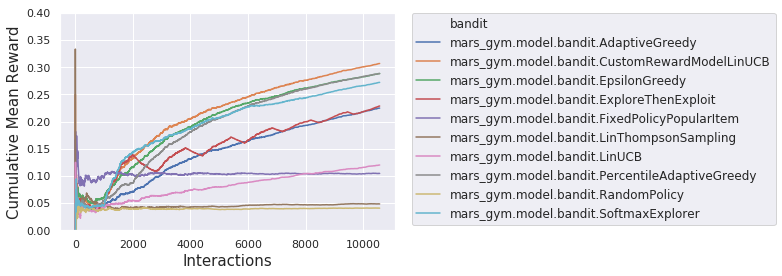

In [9]:
df_group_mean = df_group.groupby(['bandit', 'idx']).median().reset_index()

plot_cum_reward(df_group_mean, legend='full', ylim=0.4)

### Recommendation Metrics and Off-Policy Evaluation

We evaluated the bandits according to traditional recommen-
dation metrics and off-policy metrics in the test subset of the "Chicago, USA" task

In [10]:
input_metrics = [
  "precision_at_1",
  "ndcg_at_5",
  "coverage_at_5",
  "personalization_at_5",
  "IPS",
  "SNIPS",
  "DirectEstimator",
  "DoublyRobust"
]

In [11]:
# Load Métrics and Params
#
input_models_eval = fetch_results_path().keys()
data_metrics      = load_data_metrics()
data_params       = load_eval_params()
input_params      = []

df_metrics        = filter_df(data_metrics, input_models_eval, input_metrics, "")
df_eval_params    = filter_df(data_params, input_models_eval, input_params).transpose()


In [12]:
# Calculate confidence metrics
#
confidence_metrics = data_metrics[[c for c in data_metrics.columns if "_C" in c]]
for c in input_metrics:
    c_column = c+"_C" 
    confidence_metrics[c_column] = data_metrics[c_column] if c_column in data_metrics else None
confidence_metrics = confidence_metrics[[c+"_C" for c in input_metrics]]

In [13]:
# Merge and Mean 
#
df_metrics['model_task'] = data_metrics.model_task
df_params['model_task']  = df_params.iteraction.apply(lambda x: x.split("/")[-1])

df_result = df_metrics.merge(
    df_params[['bandit_policy_class', 'model_task']].reset_index()
, on='model_task')

df_result = df_result.groupby(['bandit_policy_class']).mean()
df_result

,precision_at_1,ndcg_at_5,coverage_at_5,personalization_at_5,IPS,SNIPS,DirectEstimator,DoublyRobust,index
bandit_policy_class,,,,,,,,,
mars_gym.model.bandit.AdaptiveGreedy,0.317639,0.403579,0.390850,0.767565,0.299046,0.308466,0.200657,0.267138,0
mars_gym.model.bandit.CustomRewardModelLinUCB,0.328249,0.442917,0.362862,0.729376,0.305576,0.315562,0.199502,0.266484,0
mars_gym.model.bandit.EpsilonGreedy,0.302056,0.443252,0.343287,0.733547,0.296847,0.295397,0.187270,0.254888,0
mars_gym.model.bandit.ExploreThenExploit,0.307692,0.418607,0.333071,0.731641,0.296997,0.294139,0.190652,0.256225,0
mars_gym.model.bandit.FixedPolicy,0.074271,0.171294,0.373850,0.759891,0.076116,0.077219,0.084967,0.077790,0
mars_gym.model.bandit.LinThompsonSampling,0.039788,0.137056,0.423900,0.771211,0.037423,0.035373,0.041869,0.039049,0
mars_gym.model.bandit.LinUCB,0.075928,0.207314,0.271450,0.696228,0.053439,0.056094,0.054993,0.051205,0
mars_gym.model.bandit.PercentileAdaptiveGreedy,0.336870,0.438648,0.375563,0.743905,0.321505,0.317082,0.198404,0.280774,0
mars_gym.model.bandit.RandomPolicy,0.039788,0.138404,0.389600,0.775653,0.041457,0.040577,0.042541,0.041919,0


In [14]:
df_result.round(3).to_csv('metrics.csv')

In [15]:
# fig = plot_bar(df_result, confidence = None, title="Comparison of Recsys Metrics")

# fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
# fig.update_layout(font={'family': 'Courier New, monospace', 'size': 14}, height=550)
# fig#.show(renderer="svg")

# #fig.write_image("output/tmp/metrics/recsys_rank.eps")

### Fairness Results

We evaluated the SoftmaxExplorer bandit on the “RecSys Cities" task, in the perspective of
disparate mistreatment and disparate treatment. We selected a few attributes that we judged to be sensitive for all partners in the marketplace.

In [16]:
# task_id: InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee

#### Feature - Accessibility

In [17]:
input_models_eval = 'InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee'
list_input_features    = ['accessible parking', 'accessible hotel']
input_metrics     = 'true_positive_rate'

In [18]:
# fig, df_metrics, df_total = plot_fairness_metrics(input_models_eval, input_features, input_metrics, sub_map = None)
metrics = []
sub_map = None

for input_features in list_input_features:
    df_all_metrics    = load_fairness_metrics().loc[input_models_eval]
    df_instances      = load_fairness_df().loc[input_models_eval]
    df_all_metric_filter = df_all_metrics[df_all_metrics.sub_key.isin([input_features])]

    columns         = list(np.unique(['sub_key', 'sub', 'feature', 'total_class', 'total_individuals'] + [input_metrics]))
    if input_metrics+"_C" in df_all_metrics.columns:
        columns.append(input_metrics+"_C")

    df_metrics      = filter_df(df_all_metrics, input_models_eval, columns, 'sub')

    df_metrics      = df_metrics[df_metrics.sub_key.isin([input_features])]
    if sub_map != None:
        df_metrics['sub'] = df_metrics['sub'].map(sub_map)

    df_metrics      = df_metrics.sort_values("feature").set_index("sub")
    df_metrics      = df_metrics.sort_values(input_metrics)
    metrics.append(df_metrics)

metrics = pd.concat(metrics)
metrics

,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C
sub,,,,,,
1,accessible parking.1,accessible parking,1063,2380,0.222664,0.023616
0,accessible parking.0,accessible parking,3193,10038,0.297201,0.013806
1,accessible hotel.1,accessible hotel,1345,3799,0.242414,0.020492
0,accessible hotel.0,accessible hotel,3114,8619,0.287845,0.014361


In [19]:
metrics.reset_index()
metrics['sub'] = ['parking<br>True', 'parking<br>False', 'hotel<br>True', 'hotel<br>False']
metrics['color'] = [2,2, 5,5]
metrics = metrics.set_index('sub')
metrics

,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C,color
sub,,,,,,,
parking<br>True,accessible parking.1,accessible parking,1063,2380,0.222664,0.023616,2
parking<br>False,accessible parking.0,accessible parking,3193,10038,0.297201,0.013806,2
hotel<br>True,accessible hotel.1,accessible hotel,1345,3799,0.242414,0.020492,5
hotel<br>False,accessible hotel.0,accessible hotel,3114,8619,0.287845,0.014361,5


In [20]:
fig = plot_fairness_mistreatment(metrics, input_metrics, title="")

fig.update_layout(shapes=[
  dict(
    type= 'line',
    line=dict(
        width=1,
        dash="dot",
    ),        
    xref='paper', x0= 0, x1= 1,
    yref='y',     y0= 1.5, y1= 1.5
  )
])

# Set custom x-axis labels
fig.update_xaxes(nticks=4)

fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray':['parking<br>False', 'parking<br>True', 'hotel<br>False', 'hotel<br>True']})
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False, yaxis_title="Accessible")
fig.update_layout(font={'family': 'Courier New, monospace', 'size': 22}, height=550)

fig.show()
#fig.write_image("output/tmp/metrics/paper/recsys_fairnes_{}.eps".format("accessible"))    
#fig.show(renderer="svg")

#### Feature - Accommodation Type

In [21]:
input_models_eval = 'InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee'
list_input_features    = ['hotel', 'house / apartment']
input_metrics     = 'true_positive_rate'

In [22]:
metrics = []
for input_features in list_input_features:
    df_all_metrics    = load_fairness_metrics().loc[input_models_eval]
    df_instances      = load_fairness_df().loc[input_models_eval]
    df_all_metric_filter = df_all_metrics[df_all_metrics.sub_key.isin([input_features])]

    columns         = list(np.unique(['sub_key', 'sub', 'feature', 'total_class', 'total_individuals'] + [input_metrics]))
    if input_metrics+"_C" in df_all_metrics.columns:
        columns.append(input_metrics+"_C")

    df_metrics      = filter_df(df_all_metrics, input_models_eval, columns, 'sub')

    df_metrics      = df_metrics[df_metrics.sub_key.isin([input_features])]
    if sub_map != None:
        df_metrics['sub'] = df_metrics['sub'].map(sub_map)

    df_metrics      = df_metrics.sort_values("feature").set_index("sub")
    df_metrics      = df_metrics.sort_values(input_metrics)
    metrics.append(df_metrics)

metrics = pd.concat(metrics).reset_index().sort_values(['sub_key', 'sub'])
metrics

,sub,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C
0,0,hotel.0,hotel,1649,2111,0.205584,0.020963
1,1,hotel.1,hotel,2579,10307,0.302903,0.013879
3,0,house / apartment.0,house / apartment,3044,11727,0.307458,0.013011
2,1,house / apartment.1,house / apartment,743,691,0.162758,0.030811


In [23]:
#metrics.reset_index().sort_values('sub_key')
metrics['color'] = [5,5, 2,2]
metrics['sub']   = ['hotel<br>False', 'hotel<br>True', 'house/apart<br>False', 'house/apart<br>True']
metrics = metrics.set_index('sub')
metrics

,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C,color
sub,,,,,,,
hotel<br>False,hotel.0,hotel,1649,2111,0.205584,0.020963,5
hotel<br>True,hotel.1,hotel,2579,10307,0.302903,0.013879,5
house/apart<br>False,house / apartment.0,house / apartment,3044,11727,0.307458,0.013011,2
house/apart<br>True,house / apartment.1,house / apartment,743,691,0.162758,0.030811,2


In [24]:
fig = plot_fairness_mistreatment(metrics, input_metrics, title="")

fig.update_layout(shapes=[
  dict(
    type= 'line',
    line=dict(
        width=1,
        dash="dot",
    ),        
    xref='paper', x0= 0, x1= 1,
    yref='y',     y0= 1.5, y1= 1.5
  )
])

# Set custom x-axis labels
fig.update_xaxes(nticks=4)

fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray':['house/apart<br>False', 'house/apart<br>True', 'hotel<br>False', 'hotel<br>True']})
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False, yaxis_title="Business")
fig.update_layout(font={'family': 'Courier New, monospace', 'size': 22}, height=550)


fig.show()
#fig.write_image("output/tmp/metrics/paper/recsys_fairnes_{}.eps".format("business"))    
#fig.show(renderer="svg")

#### Feature - Business Affinity



In [25]:
input_models_eval = 'InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee'
list_input_features    = ['childcare', 'family friendly']
input_metrics     = 'true_positive_rate'

In [26]:
metrics = []
for input_features in list_input_features:
    df_all_metrics    = load_fairness_metrics().loc[input_models_eval]
    df_instances      = load_fairness_df().loc[input_models_eval]
    df_all_metric_filter = df_all_metrics[df_all_metrics.sub_key.isin([input_features])]

    columns         = list(np.unique(['sub_key', 'sub', 'feature', 'total_class', 'total_individuals'] + [input_metrics]))
    if input_metrics+"_C" in df_all_metrics.columns:
        columns.append(input_metrics+"_C")

    df_metrics      = filter_df(df_all_metrics, input_models_eval, columns, 'sub')

    df_metrics      = df_metrics[df_metrics.sub_key.isin([input_features])]
    if sub_map != None:
        df_metrics['sub'] = df_metrics['sub'].map(sub_map)

    df_metrics      = df_metrics.sort_values("feature").set_index("sub")
    df_metrics      = df_metrics.sort_values(input_metrics)
    metrics.append(df_metrics)

metrics = pd.concat(metrics)
metrics

,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C
sub,,,,,,
1,childcare.1,childcare,1007,2490,0.237465,0.024281
0,childcare.0,childcare,3258,9928,0.287760,0.013512
0,family friendly.0,family friendly,2113,3313,0.200593,0.017856
1,family friendly.1,family friendly,2384,9105,0.311986,0.014863


In [27]:
metrics.reset_index()
metrics['sub'] = ['childcare<br>True', 'childcare<br>False', 'family friendly<br>True', 'family friendly<br>False']
metrics['color'] = [2,2, 5,5]
metrics = metrics.set_index('sub')
metrics

,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C,color
sub,,,,,,,
childcare<br>True,childcare.1,childcare,1007,2490,0.237465,0.024281,2
childcare<br>False,childcare.0,childcare,3258,9928,0.287760,0.013512,2
family friendly<br>True,family friendly.0,family friendly,2113,3313,0.200593,0.017856,5
family friendly<br>False,family friendly.1,family friendly,2384,9105,0.311986,0.014863,5


In [28]:
fig = plot_fairness_mistreatment(metrics, input_metrics, title="")



fig.update_layout(shapes=[
  dict(
    type= 'line',
    line=dict(
        width=1,
        dash="dot",
    ),        
    xref='paper', x0= 0, x1= 1,
    yref='y',     y0= 1.5, y1= 1.5
  )
])

# Set custom x-axis labels
fig.update_xaxes(nticks=4)

fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray':['childcare<br>False', 'childcare<br>True', 'family friendly<br>False', 'family friendly<br>True']})
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False, yaxis_title="Business")
fig.update_layout(font={'family': 'Courier New, monospace', 'size': 22}, height=550)



fig.show()
#fig.write_image("output/tmp/metrics/paper/recsys_fairnes_{}.eps".format("businesscare"))    
#fig.show(renderer="svg")

#### Feature - City

In [29]:
input_models_eval = 'InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee'
input_features    = 'city_idx'
input_metrics     = 'true_positive_rate'

In [30]:
sub_map = {'0': "Boston",
            '1': "Como",
            '2': "Chicago",
            '3': "Lausanne",
            '4': "Dublin",
            '5': "Rio de Janeiro",
            '6': "Barcelona",
            '7': "Copenhagen",
            '8': "Vienna",
            '9': "New York",
            '10': "Hong Kong",
            '11': "Vancouver"}

fig, df_metrics, df_total = plot_fairness_metrics(input_models_eval, input_features, input_metrics, sub_map = sub_map)            

In [31]:
fig.show()
#fig.write_image("output/tmp/metrics/recsys_fairnes_{}.eps".format(input_features))    

In [32]:
df_metrics.head()

,feature,sub_key,total_class,total_individuals,true_positive_rate,true_positive_rate_C
sub,,,,,,
Como,city_idx.1,city_idx,34,30,0.184211,0.164835
Dublin,city_idx.4,city_idx,265,1035,0.252908,0.041650
Copenhagen,city_idx.7,city_idx,127,572,0.289528,0.057278
Vienna,city_idx.8,city_idx,379,1282,0.291105,0.037876
Barcelona,city_idx.6,city_idx,640,1652,0.291691,0.029938


#### Feature Device

In [33]:
input_models_eval = 'InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee'
df_instances      = load_fairness_df().loc[input_models_eval]

input_features    = 'device_idx'
input_metrics     = 'true_positive_rate'
input_items_top = True
input_items     = []

,item_idx,action,rewards,rhat_scores,device_idx,city_idx,accessible parking,accessible hotel,hotel,house / apartment,childcare,family friendly,model
path,,,,,,,,,,,,,
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,7915,7915,1,0.999992,1,9,0,0,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,195,7915,0,0.032684,1,9,0,0,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,4070,7915,0,0.031409,0,9,0,0,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,297,7915,0,0.048923,2,9,0,0,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,6321,7915,0,0.046961,2,9,0,0,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,177,6254,0,0.983843,0,9,0,1,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,3366,6254,0,0.841496,0,9,0,1,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd
InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd_96b9d686ee,10316,10316,1,0.023719,0,4,0,0,1,0,0,0,InteractionTraining____mars_gym_model_b___logit_multipli_9dd8714dfd


In [34]:
fig = plot_fairness_treatment(df_instances, input_features, input_items, top=input_items_top, title="", legend={"0": "Desktop", "1": "Mobile", "2": "Tablet"})
fig.update_layout(font={'family': 'Courier New, monospace', 'size': 21}, height=600)



# Set custom x-axis labels
fig.update_yaxes(nticks=5)
fig.update_layout(xaxis_title="Hotel")

fig.show()
#fig.show(renderer="svg")
#fig.write_image("output/tmp/metrics/paper/recsys_fairnes_impact_{}.eps".format(input_features))    